In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('titanic_dataset (1).csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.isna().sum()/(len(data))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
df = data.copy()

In [10]:
df = df.drop('Cabin', axis=1)

In [11]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [12]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

<Axes: >

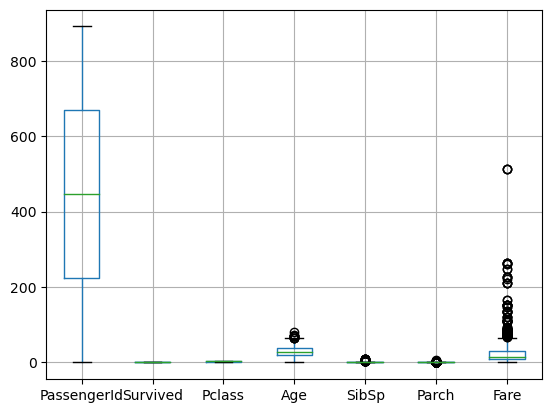

In [13]:
df.boxplot()

In [14]:
from scipy.stats import zscore
z_scores = zscore(df[['Parch', 'Fare', 'SibSp']])
outliers = abs(z_scores) > 3

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)).any(axis=1)

C:\Users\adina\AppData\Local\Temp\ipykernel_12316\3117125903.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\adina\AppData\Local\Temp\ipykernel_12316\3117125903.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
C:\Users\adina\AppData\Local\Temp\ipykernel_12316\3117125903.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)).any(axis=1)


In [16]:
df_iqr_out = df[outliers]

In [17]:
df_iqr_out

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Capping outliers

In [19]:
df_capped = df.copy()
df_capped['Parch'] = np.where(df_capped['Parch'] > (Q3['Parch'] + 1.5 * IQR['Parch']), 
                                   (Q3['Parch'] + 1.5 * IQR['Parch']), df_capped['Parch'])
df_capped['Parch'] = np.where(df_capped['Parch'] < (Q1['Parch'] - 1.5 * IQR['Parch']), 
                                   (Q1['Parch'] - 1.5 * IQR['Parch']), df_capped['Parch'])

df_capped['Fare'] = np.where(df_capped['Fare'] > (Q3['Fare'] + 1.5 * IQR['Fare']), 
                                   (Q3['Fare'] + 1.5 * IQR['Fare']), df_capped['Fare'])
df_capped['Fare'] = np.where(df_capped['Fare'] < (Q1['Fare'] - 1.5 * IQR['Fare']), 
                                   (Q1['Fare'] - 1.5 * IQR['Fare']), df_capped['Fare'])

df_capped['SibSp'] = np.where(df_capped['SibSp'] > (Q3['SibSp'] + 1.5 * IQR['SibSp']), 
                                   (Q3['SibSp'] + 1.5 * IQR['SibSp']), df_capped['SibSp'])
df_capped['SibSp'] = np.where(df_capped['SibSp'] < (Q1['SibSp'] - 1.5 * IQR['SibSp']), 
                                   (Q1['SibSp'] - 1.5 * IQR['SibSp']), df_capped['SibSp'])

In [20]:
# skewness and kurtosis
skewness = df_capped.skew(numeric_only=True)
kurtosis = df_capped.kurt(numeric_only=True)

In [21]:
skewness

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          1.621154
Parch          0.000000
Fare           1.082179
dtype: float64

In [22]:
kurtosis

PassengerId   -1.200000
Survived      -1.775005
Pclass        -1.280015
Age            0.178274
SibSp          1.776476
Parch          0.000000
Fare          -0.248978
dtype: float64

In [23]:
# Visualization

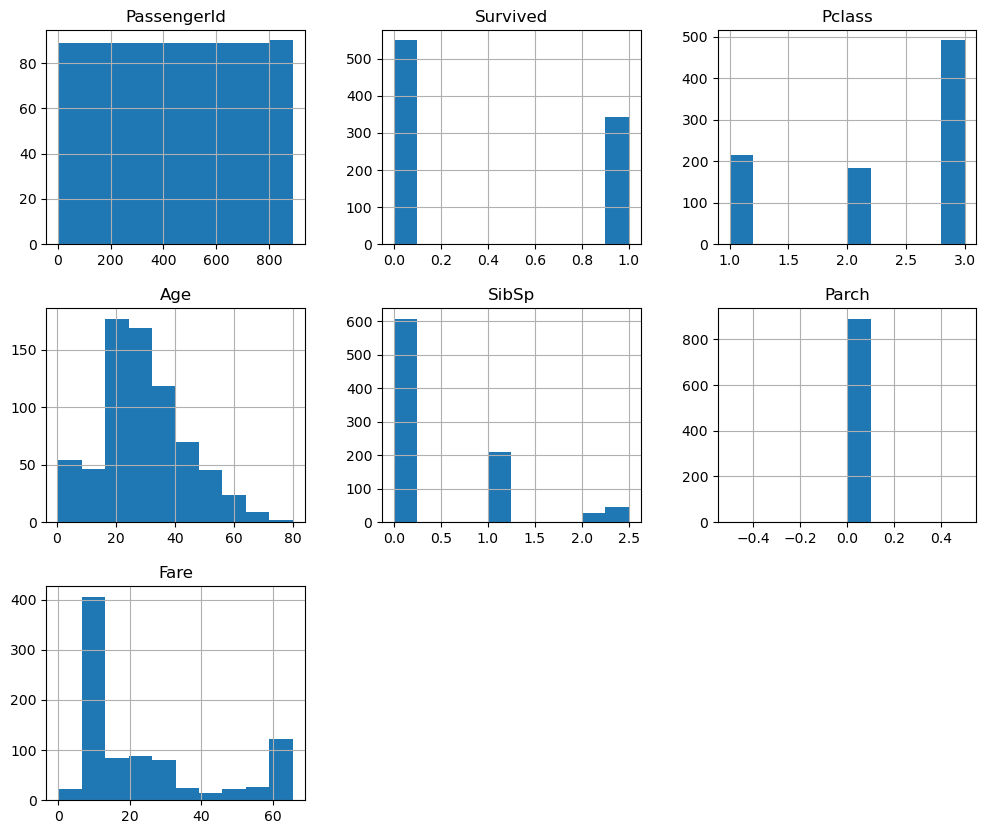

In [24]:
df_capped.hist(figsize=(12,10))
plt.show()

In [25]:
# Univariate analysis
print(df_capped['Sex'].value_counts())

male      577
female    314
Name: Sex, dtype: int64


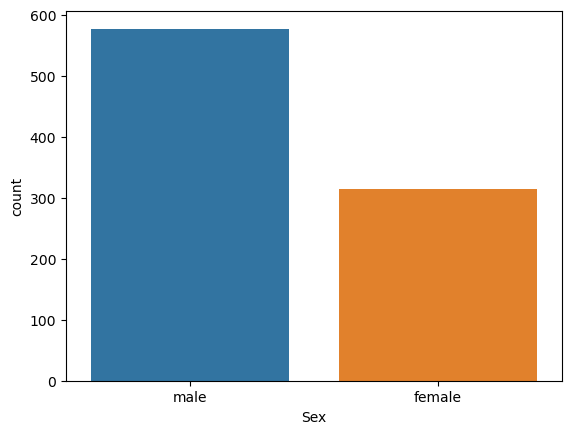

In [26]:
sns.countplot(x='Sex', data=df_capped)
plt.show()

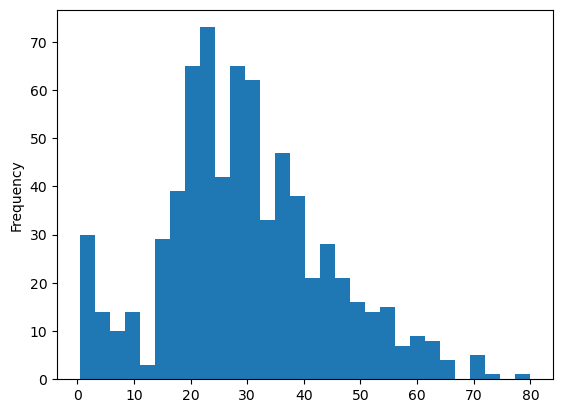

In [27]:
df_capped['Age'].plot.hist(bins=30)
plt.show()

In [28]:
# Bivariate and Multivariate Analysis

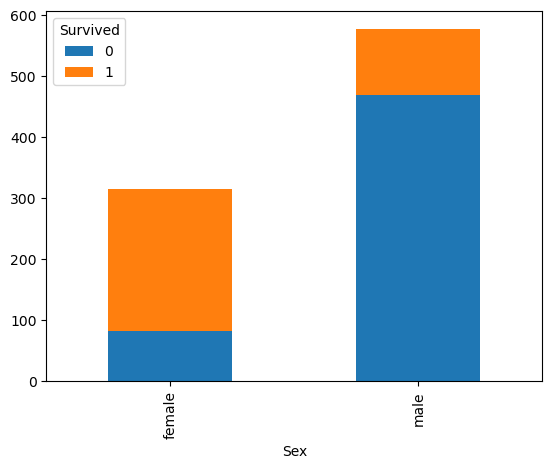

In [29]:
pd.crosstab(df_capped['Sex'], df_capped['Survived'])
cross_tab = pd.crosstab(df_capped['Sex'], df_capped['Survived'])
cross_tab.plot(kind='bar', stacked=True)
plt.show()

In [30]:
df_capped.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,65.6344,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,S


In [31]:
df_final = df_capped[['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch']]

In [32]:
df_final = pd.get_dummies(df_final)

In [33]:
df_final.head()

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male
0,0,3,1.0,0.0,0,1
1,1,1,1.0,0.0,1,0
2,1,3,0.0,0.0,1,0
3,1,1,1.0,0.0,1,0
4,0,3,0.0,0.0,0,1
